In [462]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [463]:
df = pd.read_csv('../../../data/titanic.csv',usecols=['Age','Fare','Survived'])

In [464]:
df.dropna(inplace=True)

In [465]:
df.shape

(714, 3)

In [466]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [467]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [468]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [469]:
clf = DecisionTreeClassifier()

In [470]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [471]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [472]:
np.mean(cross_val_score(clf,X,y,cv=10,scoring='accuracy'))

np.float64(0.6261150234741784)

# Using Discretization

In [473]:
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='uniform')

In [474]:
trf = ColumnTransformer([
    ('trf1',kbin_age,[0]),
    ('trf2',kbin_fare,[1])
])

In [475]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.fit_transform(X_test)

In [476]:
trf.named_transformers_['trf2']

,n_bins,15
,encode,'ordinal'
,strategy,'uniform'
,quantile_method,'warn'
,dtype,None
,subsample,200000
,random_state,None


In [477]:
trf.named_transformers_['trf2'].bin_edges_

array([array([  0.     ,  34.15528,  68.31056, 102.46584, 136.62112, 170.7764 ,
              204.93168, 239.08696, 273.24224, 307.39752, 341.5528 , 375.70808,
              409.86336, 444.01864, 478.17392, 512.3292 ])                     ],
      dtype=object)

In [478]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [479]:
output['age_labels']=pd.cut(x=X_train['Age'],bins=trf.named_transformers_['trf1'].bin_edges_[0].tolist())
output['fare_labels']=pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['trf2'].bin_edges_[0].tolist())

In [480]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
638,41.0,5.0,39.6875,1.0,"(37.6, 43.7]","(34.155, 68.311]"
361,29.0,3.0,27.7208,0.0,"(25.4, 31.5]","(0.0, 34.155]"
417,18.0,2.0,13.0000,0.0,"(13.2, 19.3]","(0.0, 34.155]"
67,19.0,2.0,8.1583,0.0,"(13.2, 19.3]","(0.0, 34.155]"
496,54.0,6.0,78.2667,2.0,"(49.8, 55.9]","(68.311, 102.466]"


In [481]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [482]:
accuracy_score(y_test,y_pred2)

0.6503496503496503

In [483]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(clf,X,y,cv=10,scoring='accuracy'))

np.float64(0.6317097026604068)

In [491]:
def discretizer(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf = ColumnTransformer([
        ('trf1',kbin_age,[0]),
        ('trf2',kbin_fare,[1])
    ])
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(clf,X,y,cv=10,scoring='accuracy')))
# -- Age      
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title('After')

    plt.show()

# -- Fare
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title('After')

    plt.show()


0.6289319248826291


d:\Python\ML Basics\venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
d:\Python\ML Basics\venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


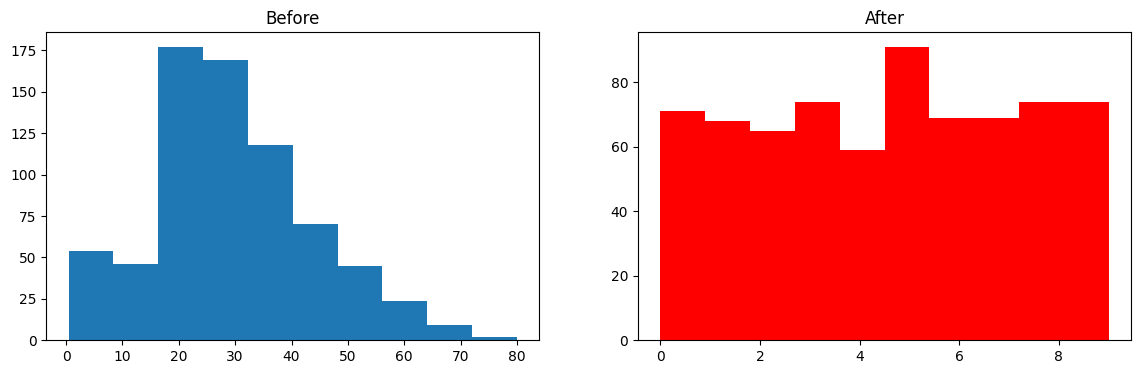

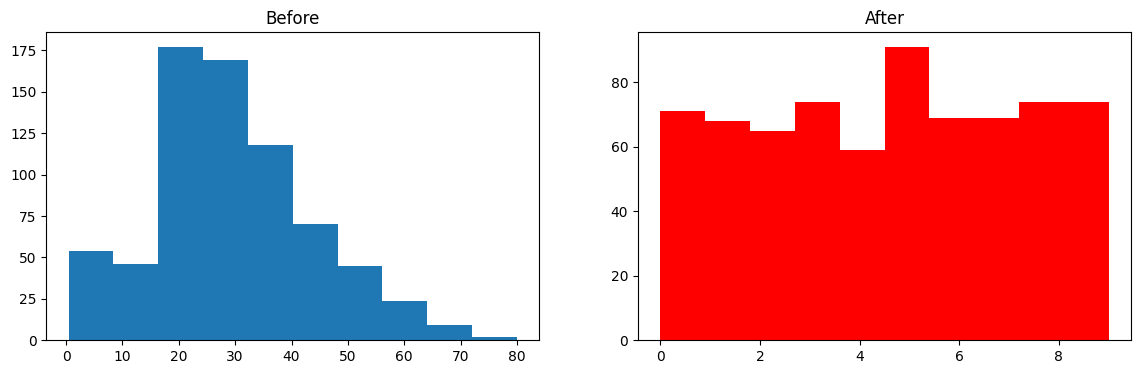

In [492]:
discretizer(10,'quantile')

0.6344679186228481


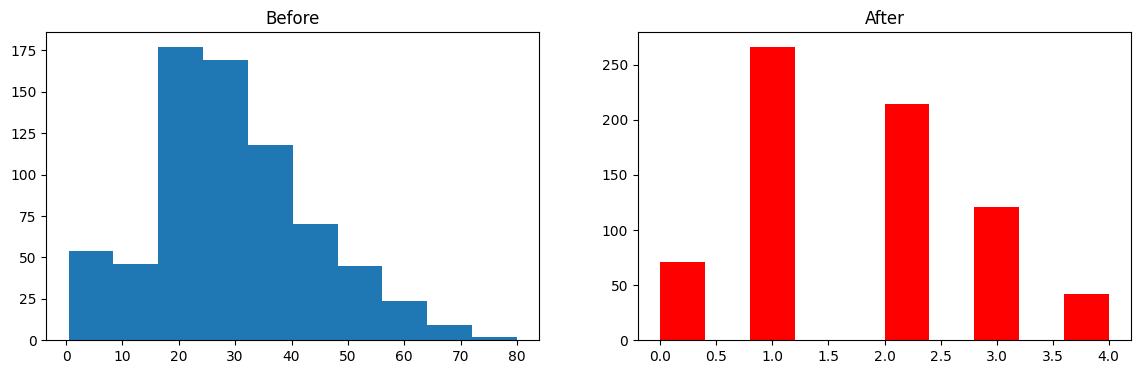

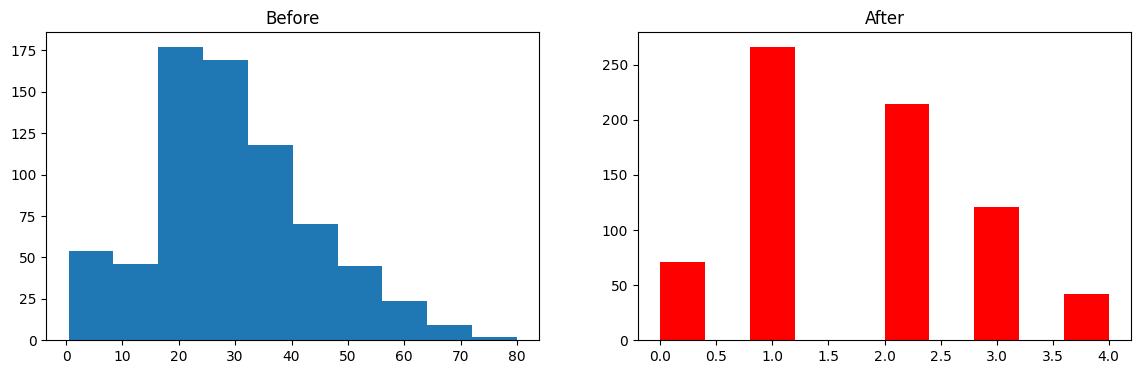

In [493]:
discretizer(5,'kmeans')